# Linear Regression Example: Predicting House Prices

In this example, we will use the California Housing dataset to predict house prices based on various features such as house age, population, average occupation etc. The dataset is available in `sklearn`.

## Steps:
1. Import necessary libraries and load the dataset.
2. Explore the dataset to understand its structure.
3. Split the dataset into training and testing sets.
4. Train a linear regression model on the training data.
5. Evaluate the model on the testing data.
6. Visualize the results.

---

### Step 1: Import Libraries and Load Dataset
We will import the necessary libraries and load the California Housing dataset from `sklearn`.

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)

# Create a DataFrame from the dataset
data = california.frame

# Display the first few rows of the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Step 2: Explore the Dataset

In this step, we will explore the dataset to understand its structure and characteristics. This includes:
- Displaying basic information about the dataset, such as column names, data types, and non-null counts.
- Generating summary statistics to understand the distribution of numerical features.
- Checking for missing values to ensure data quality.

In [5]:
# Display basic information about the dataset
data.info()

# Display summary statistics of the dataset
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Step 3: Split the Dataset into Training and Testing Sets

To train and evaluate our model, we need to split the dataset into two parts:
- **Training Set**: Used to train the model.
- **Testing Set**: Used to evaluate the model's performance on unseen data.

We will use `train_test_split` from `sklearn.model_selection` to split the dataset. Typically, 70-80% of the data is used for training, and the remaining 20-30% is used for testing.

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

### Step 4: Train a Linear Regression Model

In this step, we will train a linear regression model using the training data. Linear regression is a simple yet powerful algorithm for predicting a continuous target variable based on one or more input features.

We will use the `LinearRegression` class from `sklearn.linear_model` to fit the model to the training data.

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Display the model's coefficients and intercept
model.coef_, model.intercept_

(array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
        -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01]),
 -37.02327770606402)

### Step 5: Evaluate the Model

In this step, we will evaluate the performance of the trained linear regression model on the testing data. This includes:
- Calculating the Mean Squared Error (MSE) to measure the average squared difference between predicted and actual values.
- Calculating the R-squared score to determine how well the model explains the variance in the target variable.

We will use the `mean_squared_error` and `r2_score` functions from `sklearn.metrics` for evaluation.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
mse, r2

(0.5558915986952442, 0.575787706032451)

### Step 6: Visualize the Results

In this step, we will visualize the performance of the linear regression model by plotting the predicted values against the actual values. This will help us understand how well the model is performing and identify any patterns or discrepancies.

We will create a scatter plot where:
- The x-axis represents the actual values.
- The y-axis represents the predicted values.

Additionally, we will plot a diagonal line to indicate the ideal scenario where predicted values perfectly match the actual values.

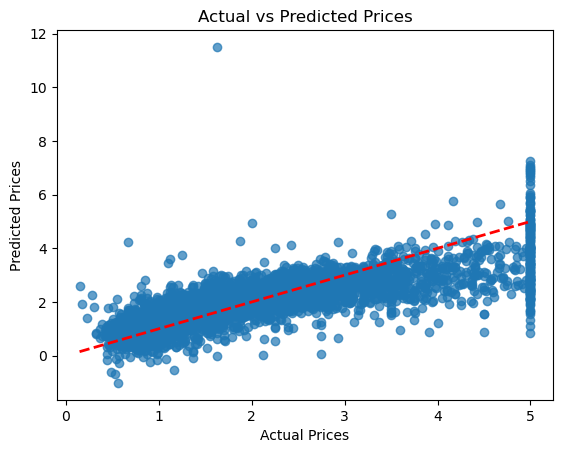

In [13]:
import matplotlib.pyplot as plt

# Step 6: Visualize the Results

# Create a scatter plot
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Plot a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()